# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».








1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучим файл с данными

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

In [101]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Пропущенные значения в столбцах name (2), genre (2), year_of_release (269), critic_score (8578), user_score(6701), rating (6766)

Необходимо заменить тип данных в столбцe year_of_release

Проверить critic_score и user_score по значениям для определения необходимых типов данных

## Подготовим данные

Приведем названия колонок к нижнему регистру

In [103]:
df.columns = df.columns.str.lower()
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [104]:
df['name'].value_counts().head(5)

Need for Speed: Most Wanted    12
Ratatouille                     9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
FIFA 14                         9
Name: name, dtype: int64

In [105]:
df.query('name == "Need for Speed: Most Wanted"').head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T


Most Wanted вышла в 2005 и 2012 году на X360. Одинковая оценка, однако продано было разное количество. По другим играм из топ 5 такого не выявлено. Думаю что присутсвует ошибка в значениях, на исследование это не повлияет, оставим как есть

In [106]:
df[df['name'].isna()]
#df[df['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [107]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [108]:
df.query('(year_of_release == "1993.0")&(platform == "GEN")').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Не предоставляется возможным выяснить название игры или хотябы жанр были выпущены наплатформе GEN в 1993 году. Уберем эти 2 строки.

In [109]:
df['year_of_release'].value_counts().head(10)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
Name: year_of_release, dtype: int64

Пик игровой разработки пришелся на период с 2005 по 2011 гг

In [110]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Представим категории рейтинга в более читабельном формате

In [111]:
def change_it(rating):
    if rating == 'E':
        return 'Everyone 6+'
    if rating == 'M':
        return 'Mature 17+'
    if rating == 'T':
        return 'Teen 13+'
    if rating == 'E10+':
        return 'Everyone 10+'
    if rating == 'K-A':
        return 'Kids to Adults'
    if rating == 'AO':
        return 'Adults Only 18+'
    if rating == 'EC':
        return 'Early childhood 3+'
    if rating == 'RP':
        return 'Rating Pending'
    return

df['rating']= df['rating'].apply(change_it)
df['rating']


0        Everyone 6+
1               None
2        Everyone 6+
3        Everyone 6+
4               None
            ...     
16710           None
16711           None
16712           None
16713           None
16714           None
Name: rating, Length: 16715, dtype: object

In [1]:
df.head(5).T

NameError: name 'df' is not defined

In [113]:
df.query('year_of_release == "NaN"').groupby('platform')['name'].count().sort_values(
                                                                                    ascending=False)

platform
Wii     34
PS2     34
X360    30
DS      30
PS3     25
XB      21
PC      17
2600    17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
PSV      1
GB       1
Name: name, dtype: int64

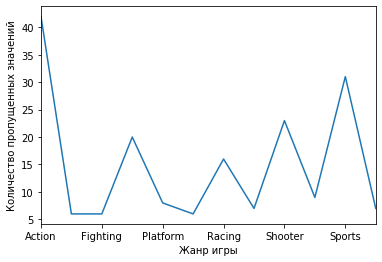

In [114]:
df.query('year_of_release == "NaN"').groupby('genre')['rating'].agg('count').plot()
plt.xlabel('Жанр игры')
plt.ylabel('Количество пропущенных значений');

Пропущенные значения в year_of_release (269) исключим из датасета, скорее данные утеряны, фактов для определения пренадлежности не обнаружено, пропущенные значения примерно в равной степени распределены между платформами и жанрами

In [115]:
df = df.loc[~(df['year_of_release'].isna()==True)]
df = df.loc[~(df['name'].isna()==True)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Приведем данные в столбце с годом выпуска к формату int, необходимости приводить в формат datetime - нет. Для исследования достаточно числовых значений

In [116]:
df['year_of_release'] = df['year_of_release'].astype('int')

Проверим critic_score (8578), user_score(6701), rating (6766)

In [117]:
df[df['critic_score'].isna()==True].isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6572
rating             6595
dtype: int64

In [118]:
df[df['user_score'].isna()==True].isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       6572
user_score         6605
rating             6543
dtype: int64

In [119]:
df[df['user_score'].isna()==False].isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1889
user_score            0
rating              133
dtype: int64

Не особо прослеживется взимосвязь между пропущенными значениями. Оставим пока все как есть, чтобы это не повлияло на статистическую значимость. В дальнейшем вернемся к этому вопросу, если в этом будет необходимость

In [2]:

df.groupby('year_of_release')[['critic_score', 'user_score', 'rating']] \
        .agg(lambda x: x.isna().mean()).mul(100) \
        .plot(title='Доли пропусков в полях по годам (в процентах)', figsize=(16, 6));

NameError: name 'df' is not defined

Посмотрим на оценки и рейтинг

In [121]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Заменим tda на значения nan (так как информации по характеру таких значений нет) и приведем значения в столбцах с оценками к численному формату

In [122]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')
df.loc[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [123]:
df['user_score'] = pd.to_numeric(df['user_score'],errors='coerce')
df['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16444, dtype: float64

In [124]:
df['rating'].unique()

array(['Everyone 6+', None, 'Mature 17+', 'Teen 13+', 'Everyone 10+',
       'Kids to Adults', 'Adults Only 18+', 'Early childhood 3+',
       'Rating Pending'], dtype=object)

Так как рейтинг - категориальная переменная, и она понадобится нам в дальнейшем для группировки, то уберем все пропущенные значения в отдельную категорию. Оценки восполнить средним не можем - это появляет распределение значений, так как недостаточно данных для корректного заполнения

In [125]:
df.loc[df['rating'].isna() == True, 'rating'] = df['rating'].fillna('Unknown') 

In [126]:
df['rating'].unique()

array(['Everyone 6+', 'Unknown', 'Mature 17+', 'Teen 13+', 'Everyone 10+',
       'Kids to Adults', 'Adults Only 18+', 'Early childhood 3+',
       'Rating Pending'], dtype=object)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 2.1+ MB


Добавим с датасет сумму продаж по всем регионам

In [128]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,Everyone 6+,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,Everyone 6+,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,Everyone 6+,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


In [129]:
df.duplicated().unique()

array([False])

Дубликатов нет, данные готовы для анализа

### Вывод

По результами предбработки в датасете изменено следующее:


1. Названия столбцов приведены к нижнему регистру

2. Данные преобразованны в нужные типы
    
    - Данные в столбце с годом выпуска приведены к формату (int), необходимости приводить в формат datetime - нет. Для исследования достаточно числовых значений
    - Значения в столбцах с оценками к приведены к численному формату (float) для удобства группировки и агрегирования
    
    
3. Обработаны пропуски в столбцах

    - Пропущенные значения в столбцах с годом выпуска(269) и названием игры(2) исключены из датасета, предпологаю, что данные утеряны, фактов для определения пренадлежности не обнаружено, пропущенные значения примрно в равной степени распределены между платформами и жанрами.
    - Не прослеживется взимосвязь между пропущенными значениями в столбцах с оценкой пользователей и критиков. Оставим пока все как есть, чтобы это не повлияло на статистическую значимость. В дальнейшем вернемся к этому вопросу, если в этом будет необходимость
    - Рейтинг - категориальная переменная и она понадобится нам в дальнейшем для группировки. Пропущенные значения собраны в отдельную категорию. Заменены категории на более читабельные


4. Аббревиатуры 'tbd' в столбцах с рейтингом заменена на значения "Unknown", так как информации по характеру таких значений нет.

5. Посчитаны суммарные продажи во всех регионах и добавлены в отдельный столбец.

6. Дубликатов нет

7. Наибольшая активность в разработке и выпуске новых игр связанна с периодом глобализации компьютеров, игровых консолей, протативных утстройств по всему миру (2005-2011 гг) 

## Проведем исследовательский анализ данных


Посмотрим на распределение продаж за все время

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.3+ MB


In [131]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

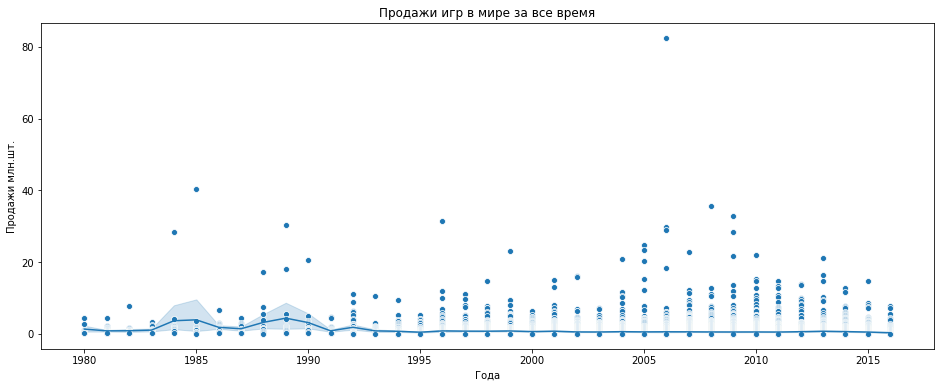

In [132]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x="year_of_release", y="total_sales")
sns.scatterplot(data=df, x="year_of_release", y="total_sales")
plt.xlabel('Года')
plt.ylabel('Продажи млн.шт.')
plt.title('Продажи игр в мире за все время');


Почти в каждом десятилетии присутсвуют игры, которые выделяются количеством продаж среди остальных, думаю что проанализировав выбросы, сможем предположить что имело массовых успех, однако построить предположение о том будет ли такой продукт иметь успех завтра - не представляется воможным. С 1980 по 1990 присутсвую всплески отдельных игр, пологаю что это первые(простые) игры которые преобрели массовую популярность ввиду новшевства и отсутствия аналогов

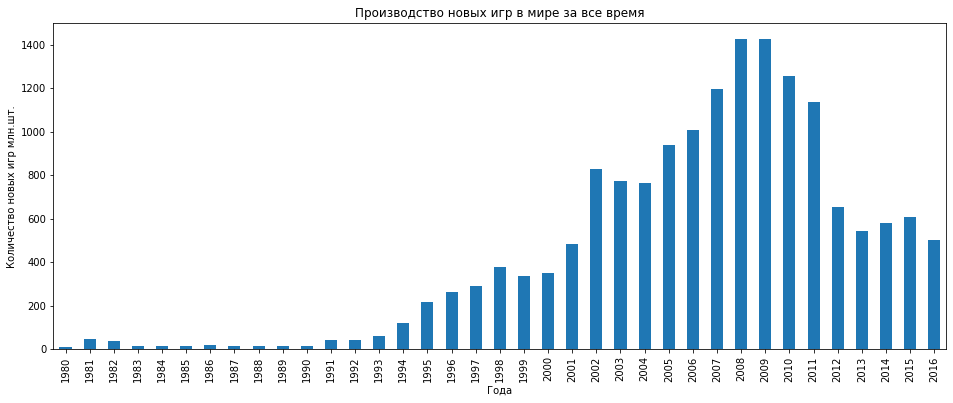

In [133]:
plt.figure(figsize=(16, 6))
df.groupby('year_of_release')['name'].agg('count').plot(kind='bar')
plt.xlabel('Года')
plt.ylabel('Количество новых игр млн.шт.')
plt.title('Производство новых игр в мире за все время');

Как было указанно ранее - основной пик развития игр на всех платформах пришелся на 2005 - 2011 года, думаю стоит использовать данные для анализа после 2005 года, в нашем случае - за последние 10 лет. так как года ДО - не имеют значимости, особенно если мы делаем прогноз на 2017 год

In [134]:
(
df.groupby('platform')['total_sales'].agg('sum')
                                         .sort_values(ascending=False)
                                         .head(10)
)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

Наиболее продаваемые игры были выпущены для платформ - PS2, X360, PS3, Wii, DS.
Сделаем срезы по платформам и годам. Попробуем определить зависимости по распределению значений сопоставив их попарно

In [135]:
PS4=df.query('(platform == "PS4")')
DS=df.query('(platform == "DS")')
PS2=df.query('(platform == "PS2")')
X360=df.query('(platform == "X360")')
PS3=df.query('(platform == "PS3")')
Wii=df.query('(platform == "Wii")')
XOne=df.query('(platform == "XOne")')

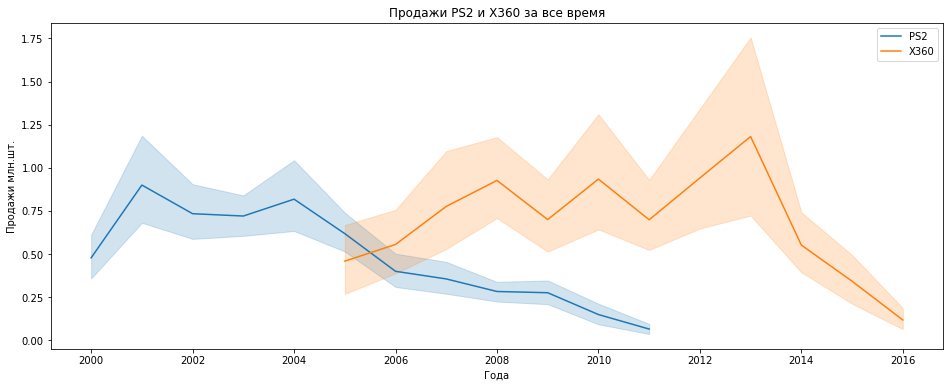

In [136]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=PS2, x="year_of_release", y="total_sales")
sns.lineplot(data=X360, x="year_of_release", y="total_sales")
plt.xlabel('Года')
plt.ylabel('Продажи млн.шт.')
plt.title('Продажи PS2 и X360 за все время')
plt.legend(['PS2','X360']);


PS2 продавался в начале 2000-х. К 2011 году, продажи упали, так как вышли более современнные версии PS. Формально жизненный цикл 10 лет. Такой же срок жизи можно наблюдать и в случае X360, которому на смену пришел XOne в 2013 году. 

X-box 360 стабильно делал хорошие продажи в 2012 году, сейчас как и PS2 - уже в прошлом/

Посмотрим на конкуренцию между X360 и PS3

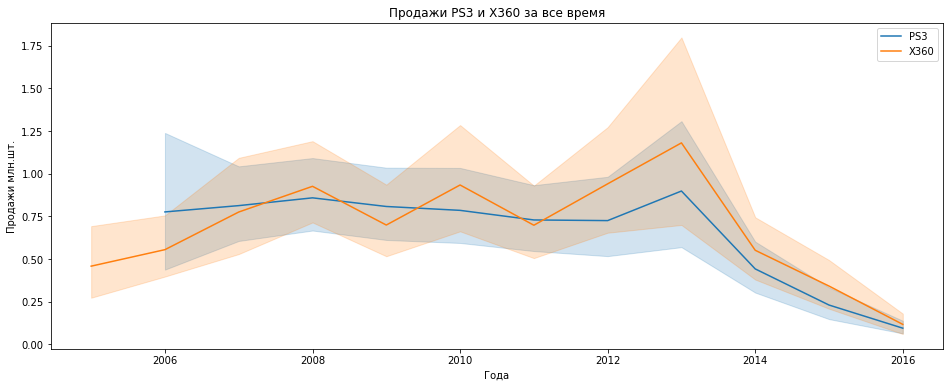

In [137]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=PS3, x="year_of_release", y="total_sales")
sns.lineplot(data=X360, x="year_of_release", y="total_sales")
plt.xlabel('Года')
plt.ylabel('Продажи млн.шт.')
plt.title('Продажи PS3 и X360 за все время')
plt.legend(['PS3','X360']);

Между PS и Xbox всегда была ожесточенная борьба за потребителя. Предполагаю что у новых версий будут похожие результаты. Кто ты, лыжник или сноубордист?

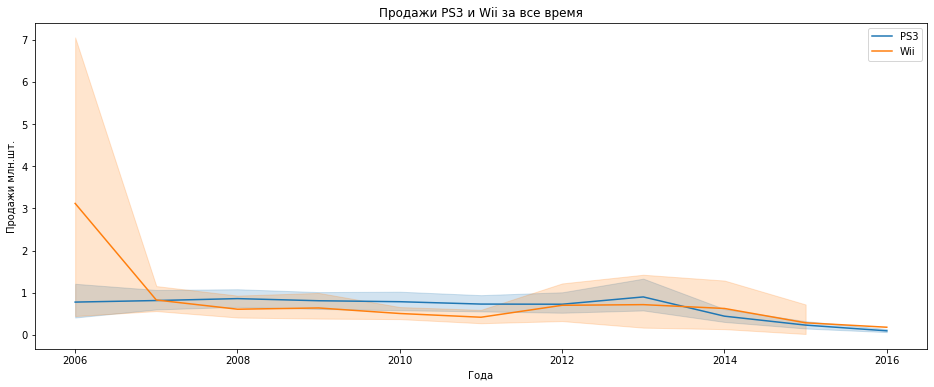

In [138]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=PS3, x="year_of_release", y="total_sales")
sns.lineplot(data=Wii, x="year_of_release", y="total_sales")
plt.xlabel('Года')
plt.ylabel('Продажи млн.шт.')
plt.title('Продажи PS3 и Wii за все время')
plt.legend(['PS3','Wii']);

PS3 достаточно массовая платформа. По графику видно, что к 2016 продажи упали, онако с 2006 года продажи этой платформы достаточно стабильно шли на уровне 700тыс шт. в год. Предпологаю что выпуск PS4 дал значительный спад. Wii тоже продавалась стабильно на протяжении 10 лет, что в дальшейшем учтем при выборе перспективных платформ

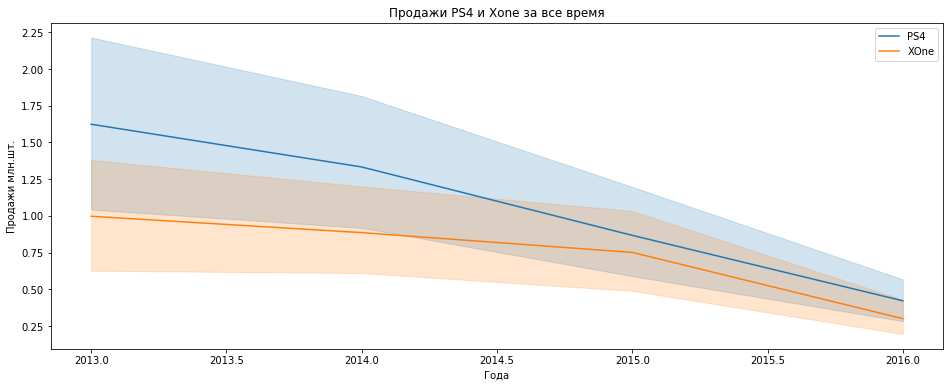

In [139]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=PS4, x="year_of_release", y="total_sales")
sns.lineplot(data=XOne, x="year_of_release", y="total_sales")
plt.xlabel('Года')
plt.ylabel('Продажи млн.шт.')
plt.title('Продажи PS4 и Xone за все время')
plt.legend(['PS4','XOne']);

У PS4 определенно были отличные продажи, так как себя зарекомендовали консоли PS2 и PS3. Более миллиона штук в год по всему миру, определенно успех, прям как у XOne, которая является обновленной версией Xbox. Предположения о конкуренции двух основных игровых консолей подтверждаются. Также можно заметить, что PS выиграла гонку вооружений у Xbox по сравнению с графиками продаж за предыдущее десетилетие

Посмотрим кому принадлежит рынок
Сделаем срез по популярным платформам

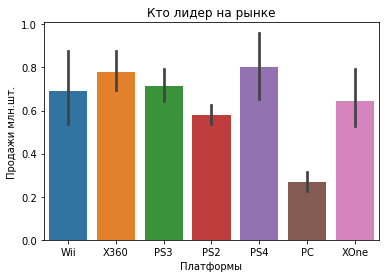

In [140]:
top_platforms = df.loc[df['platform'].isin(('PS4','PS2','PS3','X360','XOne','Wii','PC'))]
sns.barplot(data=top_platforms, x="platform", y="total_sales")
plt.xlabel('Платформы')
plt.ylabel('Продажи млн.шт.')
plt.title('Кто лидер на рынке');

Предположения подтверждаются: PS4, Wii, XOne - топ 3 платформ для игр. Есть предположение что для PC было проданно меньше всего игр, так как PC не является специлированной игровой платформой, для которой требовалось бы приобретать лицензионный диск с игрой (все есть в свободном доступе, торрент в помощь)

Посмотрим на ящик с усами по глобальным продажам игр в разбивке по платформам 

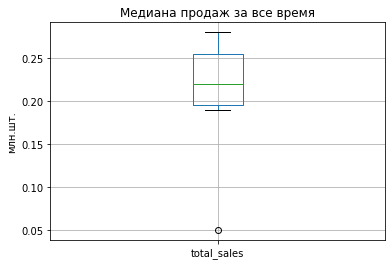

In [141]:
top_platforms.groupby('platform').median().boxplot('total_sales',
                                                     figsize=(6,4), grid=True)
plt.ylabel('млн.шт.')
plt.title('Медиана продаж за все время');


Медиана находится в районе 222 тысяч проданных игр. Если мы не захотим верить исследованию и выпустим рандомную игру в среднем не сильно заработаем. Значения медианы понадобятся нам позже для описания портрета пользователя.

In [142]:
df['total_sales'].sort_values(ascending=False).head(10)

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
5    30.26
6    29.80
7    28.91
8    28.32
9    28.31
Name: total_sales, dtype: float64

In [143]:
df.query('total_sales>20').groupby('platform').agg(NA=('na_sales', 'sum'),
                       EU=('eu_sales', 'sum'),
                       JP=('jp_sales', 'sum'),
                       OTH=('other_sales', 'sum'),
                       Total=('total_sales', 'sum')).sort_values(by='Total',ascending=False)

,NA,EU,JP,OTH,Total
platform,,,,,
Wii,118.98,85.29,24.60,23.69,252.56
DS,34.78,36.76,16.72,9.56,97.82
GB,43.47,17.33,21.64,2.29,84.73
NES,56.01,4.21,7.09,1.24,68.55
X360,15.00,4.89,0.24,1.69,21.82
PS3,7.02,9.09,0.98,3.96,21.05
PS2,9.43,0.40,0.41,10.57,20.81
SNES,12.78,3.75,3.54,0.55,20.62


Самые кассовые игр были выпущенны на плафорах Wii и GameBoy, сейчас уже им будет сложно превзойти Xbox и PS, однако такая вероятность присутсвует.

Проверим связь между отзывами пользователей и критиков. Вычислим корреляцию выбранных массивов

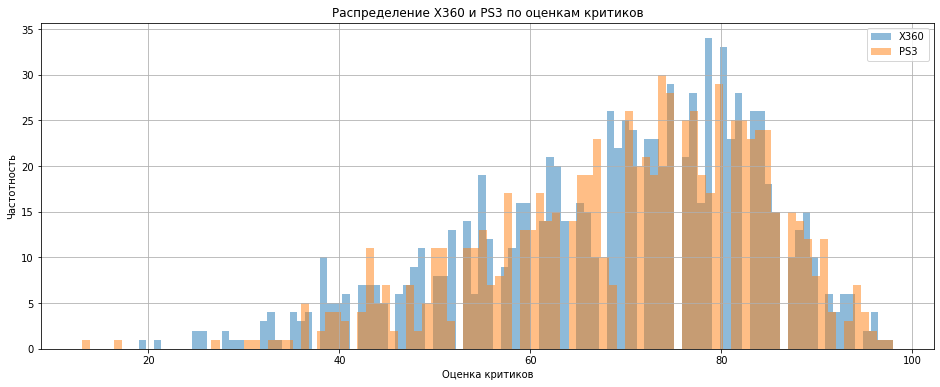

In [144]:
plt.figure(figsize=(16, 6))
ax = top_platforms.query('platform =="X360"')['critic_score'].hist(bins=100, alpha=0.5)
top_platforms.query('platform =="PS3"')['critic_score'].hist(bins=100, alpha=0.5, ax=ax)
plt.xlabel('Оценка критиков')
plt.ylabel('Частотность')
plt.title('Распределение X360 и PS3 по оценкам критиков')
plt.legend(['X360','PS3']);

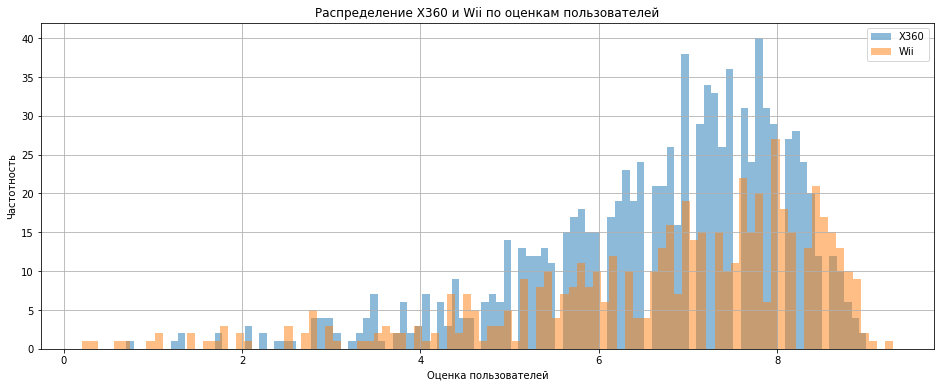

In [145]:
plt.figure(figsize=(16, 6))
ax = top_platforms.query('platform =="X360"')['user_score'].hist(bins=100, alpha=0.5)
top_platforms.query('platform =="Wii"')['user_score'].hist(bins=100, alpha=0.5, ax=ax)
plt.xlabel('Оценка пользователей')
plt.ylabel('Частотность')
plt.title('Распределение X360 и Wii по оценкам пользователей')
plt.legend(['X360','Wii']);

Пользователей X360 больше чем Wii, предполагаю что это связанно с разнообразностью жанров и игр выпускаемых на X360

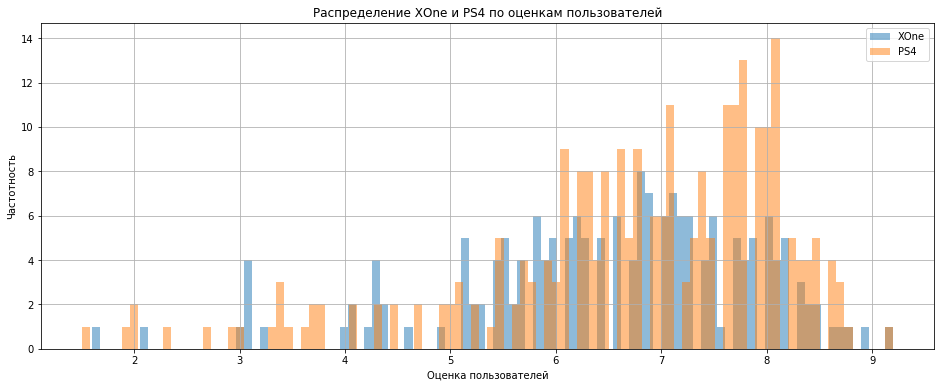

In [146]:
plt.figure(figsize=(16, 6))
ax_1 = top_platforms.query('platform =="XOne"')['user_score'].hist(bins=100, alpha=0.5)
top_platforms.query('platform =="PS4"')['user_score'].hist(bins=100, alpha=0.5, ax=ax_1)
plt.xlabel('Оценка пользователей')
plt.ylabel('Частотность')
plt.title('Распределение XOne и PS4 по оценкам пользователей')
plt.legend(['XOne','PS4']);

Что и следовало ожидать - конкуренты схожи даже в оценках пользователей. На графике прослеживается небольшое преемущество у разработчиков PS. 

Посмотрим на корреляцию массивов и построим диаграммы рассеяния

In [147]:
top_platforms['critic_score'].corr(top_platforms['total_sales'])

0.24502330018895005

In [148]:
top_platforms['user_score'].corr(top_platforms['total_sales'])

0.0808166733365487

In [149]:
df['user_score'].corr(df['total_sales'])

0.08798399271321644

In [150]:
df['critic_score'].corr(df['total_sales'])

0.24534884547411379

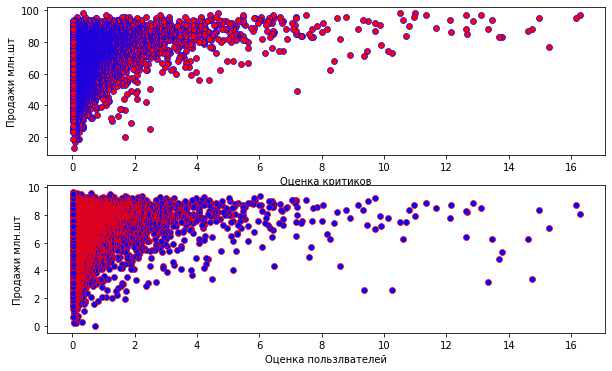

In [151]:
sale = df.query('total_sales<20')
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = sale['total_sales'], y = sale['critic_score'],
              color = "red", edgecolors = "blue", linewidths = 0.7)
ax[0].set_xlabel("Оценка критиков")
ax[0].set_ylabel("Продажи млн.шт")

ax[1].scatter(x = sale['total_sales'], y = sale['user_score'],
              color = "blue", edgecolors = "red", linewidths = 0.7)
ax[1].set_xlabel("Оценка пользлвателей")
ax[1].set_ylabel("Продажи млн.шт")

plt.show()

Исходя из диаграмм рассеяния и коэффициентам коррелияции можно утвержать, что отсутвует очевидная связь менжду глобальным количеством продаж и оценкой критиков. Думаю что оценка будет иметь связь, если оценить по жанру игры. Единсвенное что можно утвержать - оценка критиков стремеиться к более высокому значению и редко может быть низкой при большом количестве продаж по миру. С другой стороны пользователи время от времени склоняются к неудовлетворенности играми, продажи которых имеют массовый характер. 

Посмотрим на общее распределение игр по жанрам среди популярных платформ и не очень

In [152]:
top_platforms['genre'].value_counts()

Action          1659
Sports          1203
Shooter          797
Misc             796
Racing           591
Role-Playing     578
Adventure        505
Simulation       369
Fighting         358
Strategy         338
Platform         247
Puzzle           106
Name: genre, dtype: int64

Наиболее часто выпускаемые жанры игр для популярных платформ - Action, Sports, Shooter, Misc, Racing, Role-Playing

In [153]:
genre_top = df.groupby('genre')['total_sales'].agg(['mean','sum']).sort_values(by='sum',ascending=False)
genre_top

,mean,sum
genre,,
Action,0.519057,1716.52
Sports,0.567940,1309.67
Shooter,0.803519,1041.36
Role-Playing,0.628683,931.08
Platform,0.940262,825.55
Misc,0.459204,790.29
Racing,0.590122,723.49
Fighting,0.528865,442.66
Simulation,0.452695,387.96


In [154]:
genre_new=( df.query('2010<year_of_release')
             .groupby('genre')['total_sales']
             .agg(['mean','sum'])
             .sort_values(by='sum',ascending=False)
          )
genre_new

,mean,sum
genre,,
Action,0.439559,557.80
Shooter,1.224650,402.91
Role-Playing,0.528237,245.63
Sports,0.609640,237.15
Misc,0.371787,139.42
Platform,0.726885,88.68
Racing,0.490611,88.31
Fighting,0.420755,66.90
Simulation,0.369559,50.26


Shooter,Sports,Action - топ 3 жанров игр по количесвту продаж в мире, в независимости от времени выпуска. В последнее время все большую популярность набирает жанр Role-Playing. Думаю при выборе одного из переспективны хнаправлений, необходимо состредоточиться на этих жанрах.

Adventure, Puzzle, Strategy - были популярны на рубеже развития игровых индустрий, сейчас уже продаются значительно меньше

Посмотрим на посление 3 года, именно данный срез будем использовать для прогноза, считаю периоды более 3х лет - не актуальными в исследовании компьютерных игр

In [155]:
last_3_years=df.query('2013<year_of_release')



In [156]:
last_3_years.groupby(['platform'])['total_sales'].agg('median').sort_values(ascending=False)

platform
XOne    0.205
WiiU    0.190
PS4     0.185
X360    0.180
Wii     0.180
PS3     0.110
3DS     0.090
PC      0.060
PSV     0.040
PSP     0.020
Name: total_sales, dtype: float64

In [157]:
last_3_years.groupby('name')['total_sales'].agg(['sum','median']).sort_values(by='sum',
                                                                              ascending=False).head(10)

,sum,median
name,,
Call of Duty: Black Ops 3,25.67,1.700
Call of Duty: Advanced Warfare,21.97,4.360
Grand Theft Auto V,19.26,5.470
FIFA 15,17.37,1.390
FIFA 16,16.30,2.700
Minecraft,14.98,2.760
Fallout 4,12.67,4.220
Destiny,12.54,2.645
Super Smash Bros. for Wii U and 3DS,12.42,6.210


Топ игр продаваемые за последние 3 года.
- Call of Duty, 
- Grand Theft Auto V, 
- FIFA, Minecraft, 
- Fallout,
- Destiny, 
- Super Smash Bros for Wii U and 3DS 
- Star Wars Battlefront

Что подтверждает выводы относительно наиболее популярных жанров игр - Shooter,Sports,Action,Role-Playing.

In [158]:
last_3_years.groupby('genre')['total_sales'].agg('sum').sort_values(ascending=False)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

In [159]:
last_3_years.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

Нельзя утвержать что то что было продано за последние три года, будет также хорошо продаваться и дальше. 
Однако за последние 3 года количество проданных игр в категории Role-Playing может составлять конкуренцию легендарным жанрам. За последние 3 года новых игр для легендарной платформы Wii выпущенно не было, в связи с чем рынок забрали под себя производители современных игровых станций, таких как PS4, XOne.

### Вывод

По итогам исследовательского анализа:

1. Проанализированы суммарные продажи и распределение по годам для всех игр

    - Почти в каждом десятилетии присутсвуют игры, которые выделяются количеством продаж среди остальных, однако построить предположение о том, будет ли такой продукт иметь успех завтра - не представляется воможным. С 1980 по 1990 были выпушены первые(простые) игры, которые преобрели массовую популярность ввиду новшевства и отсутствия аналогов

2. Определен средний жизненный цикл для популярных платформ и выявлены пики в развитии индустрии:

    - Основной пик развития игр на всех платформах пришелся на **2005 - 2011 года**, средний жизненный цикл популярной платформы **10 лет**. Соответсвенно при выпуске новой игровой платформы будет разумным разрабатывать игры под нее. Большая часть платформ не смогли стать конкурентными к настоящему времени. 


3. Наиболее продаваемые игры были выпущены для платформ - **PS2, X360, PS3, Wii, DS**:

    - По данным между PlayStation и Xbox всегда велась ожесточенная борьба за потребителя, которая сохраняется по сей день. к 2010 году XBox удовлетворял большему числу потребителей чем PlayStation, однако за последние 3 года большая часть геймеров предпочитают выбирать консоли от PS.
    - Третьим лидером по влиянию на рынке видеоигр стала платформа - **Nintendo Wii**, которая в течении 10 лет вышла на ведущее место среди платформ, предложив рынку игры жанра - **Role-Playing**, популярность которых выросла повсеместно. Выводы схожи в отношении платформы GameBoy, которая вышла на рынок со своими уникальными предложениями, однако сейчас подобным платформам будет сложно превзойти Xbox и PS по предложениям.
    -  Последнюю строчку занимает **PC**, для данной платформы было проданно меньше всего игр, так как PC не является специлированной игровой платформой, для которой требовалось бы приобретать лицензионный диск с игрой. *Интересно было бы взглянуть на статистику по скачанным "пиратским" версиям игр для PC.*
    - Ящик с усами показал, что **медиана** общего количесвта продаж находится в районе **222 тысяч шт**. Значения медианы понадобятся нам для описания портрета пользователя.


4. Зависимость между отзывами пользователей, критиков и глобальными продажами не прослеживается: 

    - Исходя их диаграмм рассеяния и коэффициентов корреляции можно утвержать, что почти отсутвует связь менжду глобальным количеством продаж и оценкой критиков. Интуитивно понятно, что оценка критиков стремеиться к более высокому значению и редко может быть низкой при большом количестве продаж по миру. С другой стороны пользователи время от времени склоняются к неудовлетворенности играми, продажи которых имеют массовый характер. Концентрация значений присутсвует в районе отметки в 8 баллов из 10, что можно характеризовать как "хорошо"



5. Наиболее часто выпускаемые жанры игр для популярных платформ - **Action, Sports, Shooter, Misc, Racing, Role-Playing**

    - Shooter (Call of Duty), Sports (FIFA), Action(Grand Theft Auto V), Role-Playing (Super Smash Bros) - наиболее популярные жанры игр по количесвту продаж в мире, в независимости от времени выпуска. В последнее время все большую популярность набирает жанр Role-Playing. Думаю при выборе одного из переспективных направлений, необходимо состредоточиться на этих жанрах.

    - В свою очередь Adventure, Puzzle, Strategy - были популярны на рубеже развития игровой индустрии, сейчас уже продаются значительно меньше


## Составим портрет пользователя каждого региона


Сравним как менялись возрастные категории со временем. Последние 3 года у нас уже объявлено, добавим еще последние 16 лет с 2000 года

In [165]:
last_16_years=df.query('1999<year_of_release')

Напишу функцию, которая вернет мне фрейм с долями продаж по регионам в зависимости от категории группировки

Напишу функцию, которая вернет мне топ 3 наиболее встречающихся элемента из выбранной категории 

In [166]:
def area(df,column):
    regions=['na_sales','eu_sales','jp_sales',
             'other_sales','total_sales']
    report = df.groupby(column)[regions].sum()
    
    report = report.div(report.sum()).sort_values(by='total_sales',
                                              ascending=False)
    report.columns=('NA','EU','JP','OTH','TOTAL')
    
    return report

def top_3(df,column,name,year):
    
    top=df[column].sort_values(ascending=False).head(3).index.tolist()
    
    return print(f'Топ категории в {name} за {year}: ', ', '.join(top))

Объявлю несколько таких таблиц для удобства дальнейшего использования

In [167]:
rating_3 = area(last_3_years,column='rating')
rating_16 = area(last_16_years,column='rating')

genre_3 = area(last_3_years,column='genre')
genre_16 = area(last_16_years,column='genre')

platf_3 =area(last_3_years,column='platform')
platf_16 = area(last_16_years,column='platform')

genre_16#exemple


,NA,EU,JP,OTH,TOTAL
genre,,,,,
Action,0.213131,0.223714,0.162082,0.240458,0.213176
Sports,0.166984,0.162820,0.093011,0.173147,0.157968
Shooter,0.140307,0.140976,0.028536,0.137575,0.127487
Role-Playing,0.079981,0.074650,0.296279,0.070759,0.102138
Misc,0.103487,0.094318,0.104717,0.097430,0.100340
Racing,0.077150,0.092069,0.034003,0.094752,0.078370
Platform,0.072968,0.067127,0.067748,0.057134,0.069061
Simulation,0.045946,0.050201,0.049227,0.038978,0.046851
Fighting,0.045549,0.035726,0.055024,0.043579,0.043567


Итак, можем посмотреть на топ 3 популярных категорий в каждом регионе

Топ категории в США за 3 года:  Mature 17+, Unknown, Everyone 6+
Топ категории в Европе за 3 года:  Mature 17+, Unknown, Everyone 6+


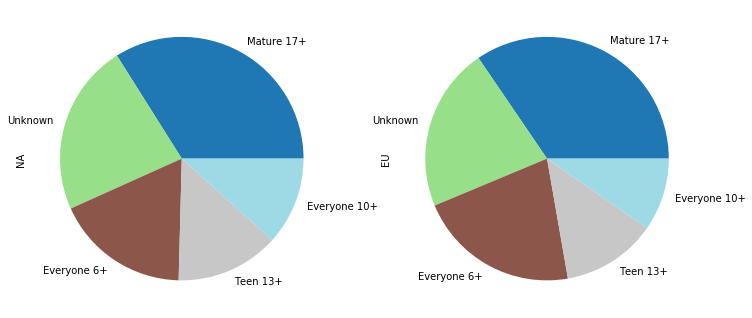

In [169]:
rating_3[['NA','EU']].plot.pie(subplots=True,
                                          figsize=(12, 6),
                                          legend=False,
                                          colormap='tab20');

top_3(rating_3,'NA','США','3 года')                                          
top_3(rating_3,'EU','Европе','3 года')


Топ категории в Японии за 3 года:  Unknown, Teen 13+, Everyone 6+
Топ категории в Других странах за 3 года:  Mature 17+, Unknown, Everyone 6+


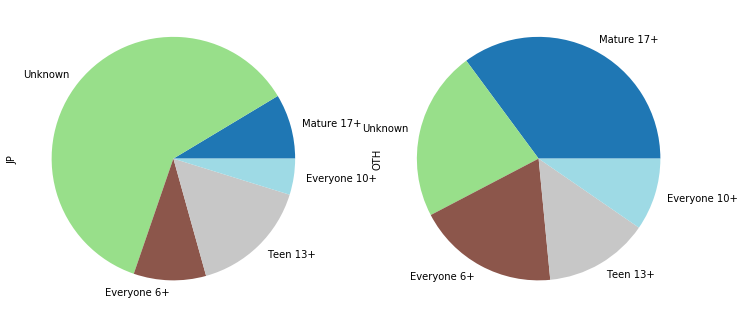

In [170]:
rating_3[['JP','OTH']].plot.pie(subplots=True,
                                          figsize=(12, 6),
                                          legend=False,colormap='tab20');
top_3(rating_3,'JP','Японии','3 года')
top_3(rating_3,'OTH','Других странах','3 года')

Преобладающие возрастные категории на рынке США и Европы за последние 3 года:
**Mature 17+, Unknown, Everyone 6+**, Игры проданные в Других странах также можно отнести к этим категориям
С начала 2000-х стабильно лидировали данные рейтинги, однако Unknown вытеснил  Teen 13+ на 4 строчку, думаю игры становятся более универсальные с каждым годом.
Пологаю что основная категория пользователей школьники студенты, от 6 до 25 лет.
Среди лидеров в **Японии Unknown, Everyone 6+, Teen 13+**, а при усовии что в Японии достаточно мало пользователей, то основными категориями на которые стоит ориентироваться Игры лля всех (**Everyone 6+**)

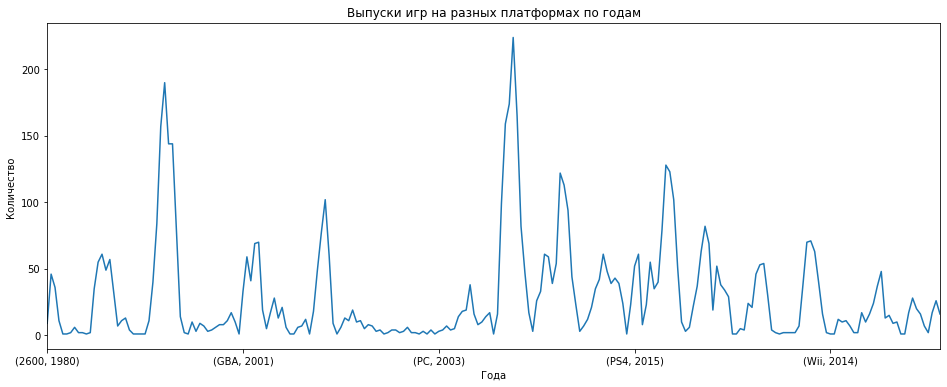

In [171]:
plt.figure(figsize=(16, 6))
(
    df.query('rating=="Unknown"')
         .groupby(['platform','year_of_release'])['name'].count()
                        .plot(x='year_of_release')
)

plt.xlabel('Года')
plt.ylabel('Количество ')
plt.title('Выпуски игр на разных платформах по годам');

Полагаю что рейтинг **Unknown**, пока еще просто не определен, согласно графику игры с таким рейтингом пока еще предстоит выяснить, плюс не сразу начали определять рейтинг выходили такие игры хаоитично.

In [172]:
(
df.query('rating=="Mature 17+"')
    .groupby(['genre'])['name']
    .count().sort_values(ascending=False).head(5)
)

genre
Action          596
Shooter         553
Role-Playing    161
Adventure        98
Fighting         48
Name: name, dtype: int64

**Action, Shooter, Role-Playing** - топ 3 за все время  
>«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.(https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

Что за весь период, что за последние 3 года - троица лидеров

Что по поводу игр для всех..

In [173]:
(
df.query('rating=="Everyone 6+"')
    .groupby(['genre'])['name']
    .count().sort_values(ascending=False).head(5)
)

genre
Sports      1162
Racing       576
Misc         449
Action       410
Platform     354
Name: name, dtype: int64

Да, не все способны играть в шутеры на джостиках. Проще всего даются Sports,Racing,Action/Misc(Minecraft), данные не врут.

In [174]:
(
df.query('rating=="Unknown"')
    .groupby(['genre'])['name']
    .count().sort_values(ascending=False).head(10)
)

genre
Action          1161
Misc             859
Adventure        853
Sports           828
Role-Playing     711
Fighting         405
Racing           370
Strategy         341
Platform         317
Shooter          300
Name: name, dtype: int64

Action, Misc, Adventure, Sports, Role-Playing топ 5 жанров с неизвестной(уточняющейся) категории, пока все подтверждается

Посмотрим на распределение платформ по регионам

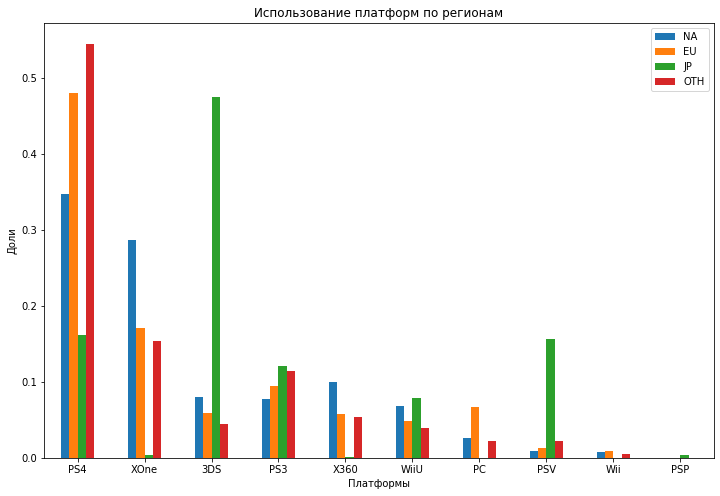

In [175]:
platf_3[['NA','EU','JP','OTH']].plot.bar(figsize=(12, 8), rot=0)
plt.title('Использование платформ по регионам')
plt.xlabel('Платформы')
plt.ylabel('Доли');

PS4 и XOne лидеры в продажах за последние 3 года по всему миру, кроме Японии, там основной контингент предпочитает платформу 3DS, 

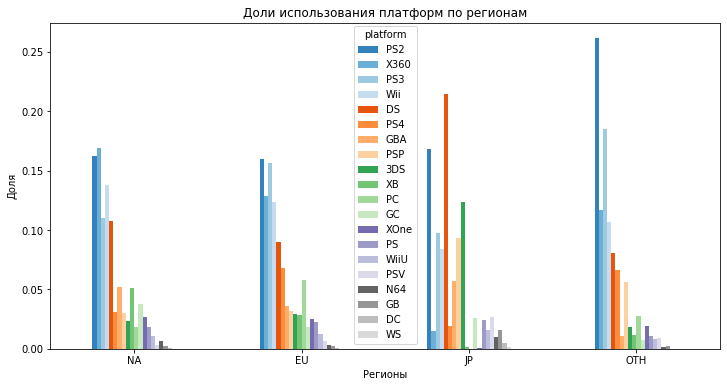

In [176]:

(
platf_16[['NA', 'EU', 'JP', 'OTH']].T
    .plot.bar(figsize=(12, 6), rot=0, colormap='tab20c')
)
plt.title('Доли использования платформ по регионам')
plt.xlabel('Регионы')
plt.ylabel('Доля');

C начала 2000-х самые популярные платформы - PS2, X360,PS3,Wii,
Япония снова выделяется уникальностью, где DS и 3DS являются предпочитаемыми игровыми платформами

Посмотрим на жанры которые выбирают наши пользователи

Топ категории в Японии за 3 года:  Role-Playing, Action, Fighting
Топ категории в Других странах за 3 года:  Action, Shooter, Sports


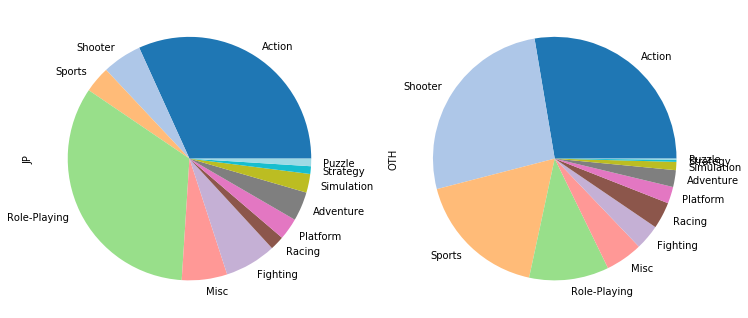

In [177]:
genre_3[['JP','OTH']].plot.pie(subplots=True,
                                          figsize=(12, 6),
                                          legend=False,colormap='tab20');
top_3(genre_3,'JP','Японии','3 года')
top_3(genre_3,'OTH','Других странах','3 года')

Топ категории в США за 3 года:  Shooter, Action, Sports
Топ категории в Европе за 3 года:  Action, Shooter, Sports


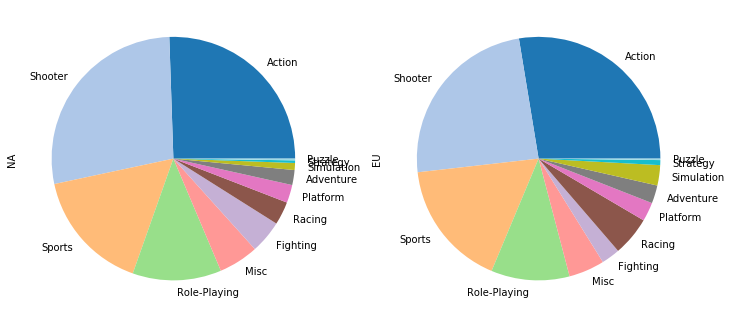

In [178]:
genre_3[['NA','EU']].plot.pie(subplots=True,
                                          figsize=(12, 6),
                                          legend=False,colormap='tab20');
top_3(genre_3,'NA','США','3 года')
top_3(genre_3,'EU','Европе','3 года')

Выводы подтверждаются, Action, Shooter, Sports - Для всего мира
Role-Playing, Action, Fighting - для Японии

### Вывод

По итогам исследовательского аналализа жанров, платформ, возрастных категорий (разбитых на доли продаж в каждом регионе), получается описать потреты основных потребителей:

Преобладающие возрастные категории на рынке **США, Европы и Других стран** за последние 3 года:
**Mature 17+, Unknown, Everyone 6+** наиболее часто относящиеся к жанрам: 
- Action, Shooter, Sports

Категория игр которая является **универсальной** - Игры лля всех (**Everyone 6+**), такая категория предпочитает преемущественно:
- Sports,Racing,Action/Misc(Minecraft). 

Игры становятся более универсальные с каждым годом, в связи с чем категории объединяются в более широкие.  


Основная категория пользователей - **школьники студенты - от 6 до 25 лет**, находящиеся по всему миру которые предпочитают флагманские платформы, такие как **PS4 и XOne**, уверен что разработка игр под будущие версии будет иметь успех. C начала 2000-х самые популярные платформы - PS2,X360,PS3,Wii зарекомендовали себя на рынке

Однако стоит заметить, что в **Японии** схожий потребитель, но основной контингент там предпочитает **DS и 3DS**. Рейтинг Unknown оражает в равной степени присутствие в таких жанрах игры, как: 
- Action, Misc, Adventure, Sports, Role-Playing, 

последний особенно популярен в Японии, среди лидеров возрастных рейтингов таких как: 
- Unknown, Everyone 6+, Teen 13+, 
с соответсвующим распределением жанров: **Role-Playing, Action, Fighting**

## Проверим гипотезы

Уровень статистической значимости определен в 5%
Установим нулевую и альтернативную гипотезы относительно игровых платформ:

**Нулевая** - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Альтернативная** - Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [189]:
pc = last_3_years.query('(platform=="PC")')
xone = last_3_years.query('(platform=="XOne")')
pc_info = (
    pc.pivot_table(index='platform',
               columns=['genre'],
               values='user_score',aggfunc=['mean']).T.sort_values(by='PC',
                                                                 ascending=False)

)
xone_info = (
    xone.pivot_table(index='platform',
               columns=['genre'],
               values='user_score',aggfunc=['mean']).T.sort_values(by='XOne',
                                                                 ascending=False)
)
pc_xone = pc_info.merge(xone_info, how='left',left_on='genre', right_on='genre')
pc_xone

platform,PC,XOne
genre,,
Adventure,8.075000,7.550000
Strategy,6.992308,8.100000
Role-Playing,6.864706,7.522222
Action,6.366667,6.703636
Racing,6.250000,6.692857
Shooter,6.227778,6.637931
Simulation,6.093750,6.300000
Sports,4.818182,5.626667
Platform,4.400000,5.625000


Должно быть и правда есть пересечения в значениях.. А что скажет describe()

In [190]:
#pc[pc['user_score'].isna()]['year_of_release'].describe()
pc[pc['user_score'].isna()==False]['year_of_release'].describe()

count     122.000000
mean     2015.057377
std         0.826215
min      2014.000000
25%      2014.000000
50%      2015.000000
75%      2016.000000
max      2016.000000
Name: year_of_release, dtype: float64

In [191]:
xone[xone['user_score'].isna()]['year_of_release'].describe()
#xone[xone['user_score'].isna()==False]['year_of_release'].describe()

count      63.000000
mean     2015.063492
std         0.780261
min      2014.000000
25%      2014.000000
50%      2015.000000
75%      2016.000000
max      2016.000000
Name: year_of_release, dtype: float64

In [192]:
pc=pc[~(pc['user_score'].isna())]
xone=xone[~(xone['user_score'].isna())]

И тут 2014. Стандартные отклонения выборок близки, средние значения равны, что может быть лучше для т-теста..

In [193]:
alpha = 0.05

results = st.ttest_ind(pc['user_score'], xone['user_score'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Ниже уровня статистической значимости")
else:
    print("Средние пользовательские рейтинги платформ Xbox One и PC могут быть схожи, необходимо доп.исследование") 

p-value:  0.10450507919348415
Средние пользовательские рейтинги платформ Xbox One и PC могут быть схожи, необходимо доп.исследование


In [194]:
action = last_3_years.query('(genre=="Action")')
sports = last_3_years.query('(genre=="Sports")')
action_info = (
    action.pivot_table(index='genre',
               columns=['platform'],
               values='user_score',aggfunc=['mean']).T.sort_values(by='Action',
                                                                 ascending=False)

)
sports_info = (
    sports.pivot_table(index='genre',
               columns=['platform'],
               values='user_score',aggfunc=['mean']).T.sort_values(by='Sports',
                                                                 ascending=False)
)
action_sports = action_info.merge(sports_info,
                                  how='left',
                                  left_on='platform',
                                  right_on='platform')
action_sports


genre,Action,Sports
platform,,
PSV,7.470370,6.300000
PS4,6.913953,5.818421
WiiU,6.895833,6.150000
XOne,6.703636,5.626667
3DS,6.582609,5.300000
X360,6.500000,4.273684
PS3,6.392857,4.447619
PC,6.366667,4.818182


In [195]:
#action[action['user_score'].isna()]['year_of_release'].describe()
action[action['user_score'].isna()==False]['year_of_release'].describe()

count     297.000000
mean     2014.936027
std         0.796497
min      2014.000000
25%      2014.000000
50%      2015.000000
75%      2016.000000
max      2016.000000
Name: year_of_release, dtype: float64

In [196]:
#sports[sports['user_score'].isna()]['year_of_release'].describe()
sports[sports['user_score'].isna()==False]['year_of_release'].describe()

count     127.000000
mean     2014.937008
std         0.804235
min      2014.000000
25%      2014.000000
50%      2015.000000
75%      2016.000000
max      2016.000000
Name: year_of_release, dtype: float64

**Нулевая гипотеза** - это то, что мы хотим опровергнуть, если перед нами стоит задача доказать значимость различий.
- Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза** - это то, что мы хотим доказать, поэтому иногда ее называют экспериментальной гипотезой. 
- Средние пользовательские рейтинги жанров Action и Sports различаются

In [197]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(action.dropna()['user_score'], sports.dropna()['user_score'])


print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value:  4.0540895999943536e-10
Отвергаем нулевую гипотезу


## Общий вывод





1. По результами предбработки в датасете изменено:

    - Названия столбцов приведены к нижнему регистру
    - Данные преобразованны в нужные типы
    - Обработаны пропуски в столбцах
    - Посчитаны суммарные продажи во всех регионах и добавлены в отдельный столбец.


2. По итогам исследовательского анализа можно заключить:

    - В каждом десятилетии присутсвуют игры, которые выделяются количеством продаж среди остальных, однако построить предположение о том, будет ли такой продукт иметь успех завтра - не представляется воможным.
    - Наиболее продаваемые игры были выпущены для платформ - **PS2, X360, PS3, Wii, DS**, так как были вупущены в сновной пик развития игр на всех платформах в **2005 - 2011 года**, средний жизненный цикл популярной платформы составляет порядка **10 лет**. 
    - С самого зарождения индустрии между PlayStation и Xbox всегда велась ожесточенная борьба за потребителя, которая сохраняется по сей день. к 2010 году XBox удовлетворял большему числу потребителей чем PlayStation, однако за последние 3 года большая часть геймеров предпочитают выбирать консоли от PS.
    - Отдельное внимание необходимо обратить в сторону платформы - **Nintendo Wii**, которая в течении 10 лет вышла на ведущее место среди платформ, предложив рынку игры жанра - **Role-Playing**, популярность которых выросла повсеместно. 
    - Исходя из диаграмм рассеяния и коэффициентов корреляции можно утвержать, что почти отсутвует связь менжду глобальным количеством продаж и оценкой критиков.



Наиболее часто выпускаемые жанры игр с наиболее продаваемыми играми для современных популярных платформ: 

>**Shooter (Call of Duty)** 

>**Sports (FIFA)**

>**Action(LEGO Marvel Super Heroes)**

>**Role-Playing (Marvel: Ultimate Alliance)** 

В свою очередь *Adventure, Puzzle, Strategy* - были популярны на рубеже развития игровой индустрии, сейчас уже продаются значительно меньше





3. В результате сравнения процентов распредления жанров, платформ и рейтингов среди регионов США, Европа, Япония, Другое, можно составить портреты пользователей по регионам: 


По итогам исследовательского аналализа жанров, платформ, возрастных категорий (разбитых на доли продаж в каждом регионе), получается описать потреты основных потребителей:

Преобладающие возрастные категории на рынке **США, Европы и Других стран** за последние 3 года:
**Mature 17+, Unknown, Everyone 6+** наиболее часто относящиеся к жанрам: 
- Action, Shooter, Sports

В США продается игр в среднем в 1.5 - 2 раза больше чем вдругих регионах

Категория игр которая является **универсальной** - Игры лля всех (**Everyone 6+**), такая категория предпочитает преемущественно:
- Sports,Racing,Action/Misc(Minecraft). 

Игры становятся более универсальные с каждым годом, в связи с чем категории объединяются в более широкие.  


Основная категория пользователей - **школьники студенты - от 6 до 25 лет**, находящиеся по всему миру которые предпочитают флагманские платформы, такие как **PS4 и XOne**, уверен что разработка игр под будущие версии будет иметь успех. C начала 2000-х самые популярные платформы - PS2,X360,PS3,Wii зарекомендовали себя на рынке

Однако стоит заметить, что в **Японии** схожий потребитель, но основной контингент там предпочитает **DS и 3DS**. Рейтинг Unknown оражает в равной степени присутствие в таких жанрах игры, как: 
- Action, Misc, Adventure, Sports, Role-Playing, 

последний особенно популярен в Японии, среди лидеров возрастных рейтингов таких как: 
- Unknown, Everyone 6+, Teen 13+, 
с соответсвующим распределением жанров: **Role-Playing, Action, Fighting**
 


4. По резульатам статистических тестов, направленных на определение равенства средних двух выборок можно заключить следующее:

    - Средние пользовательские рейтинги платформ Xbox One и PC могут быть схожи, необходимо доп.исследование
    - Алетрнативную гипотезу о наличии резличий между средними пользовательских рейтингов жанров Action и Sports можно принять во внимание, так как результат проведенного теста позволил отменить нулевую гипотезу, о равенстве средних значений.



